In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

# load data

In [63]:
# sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/runs_0_51000_results.csv')
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/runs_0_100_simulationruns_results.csv')
print len(sims),'runs in the sample'

78 runs in the sample


In [69]:
sims=sims[sims.parameters_reconstructed_well]
print len(sims),'runs in the sample'

76 runs in the sample


## sigma_t

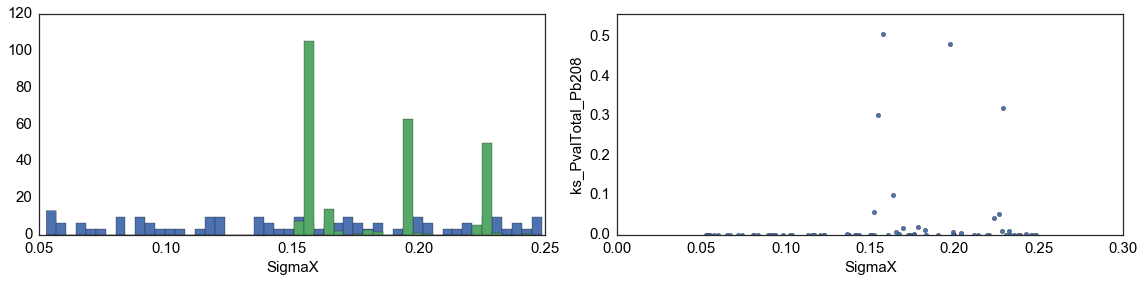

In [64]:
var,w = 'SigmaX', 'ks_PvalTotal_Pb208' #ks_PvalTot_allPvals_C12'
# sims.ks_local_Pval_pcmX_bin0_C12
weights = sims[w]
x = sims['gen_'+var]
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
h,bins,_=plt.hist(x,bins=50,normed=1);
plt.hist(x,weights=weights,bins=bins,normed=1);
set_axes(ax,x_label=var,fontsize=15)
ax = fig.add_subplot(1,2,2)
plt.scatter(x,weights);
set_axes(ax,x_label=var,y_label=w,fontsize=15)
ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
plt.tight_layout()

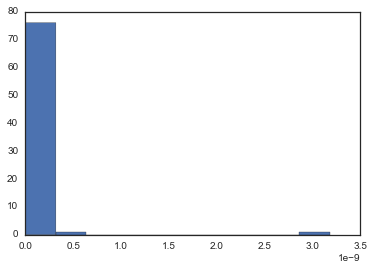

In [65]:
# plt.hist( sims.ks_local_Pval_pcmX_bin0_C12*sims.ks_local_Pval_pcmX_bin1_C12*sims.ks_local_Pval_pcmX_bin2_C12*sims.ks_local_Pval_pcmX_bin3_C12*sims.ks_local_Pval_pcmX_bin4_C12 );
# plt.hist( sims.ks_local_Pval_pcmY_bin0_C12*sims.ks_local_Pval_pcmY_bin1_C12*sims.ks_local_Pval_pcmY_bin2_C12*sims.ks_local_Pval_pcmY_bin3_C12*sims.ks_local_Pval_pcmY_bin4_C12 );
plt.hist( sims.ks_local_Pval_pcmZ_bin0_C12*sims.ks_local_Pval_pcmZ_bin1_C12*sims.ks_local_Pval_pcmZ_bin2_C12*sims.ks_local_Pval_pcmZ_bin3_C12*sims.ks_local_Pval_pcmZ_bin4_C12 );

In [8]:
# x = sims.ks_local_Pval_pcmZ_bin0_C12*sims.ks_local_Pval_pcmZ_bin1_C12*sims.ks_local_Pval_pcmZ_bin2_C12#*sims.ks_local_Pval_pcmZ_bin3_C12#*sims.ks_local_Pval_pcmZ_bin4_C12
x = sims.ks_local_Pval_pcmZ_bin3_C12
print [np.min(x), np.max(x)]

[0.0, 0.73698399999999997]


In [70]:
for i in range(len(sims.columns)):
    print sims.columns[i]

NLostEvents
NentriesSimRun
fracLostEvents
gen_MeanX
gen_MeanY
gen_SigmaX
gen_SigmaY
gen_a1
gen_a2
gen_b1
gen_b2
recMeanX
recMeanY
recSigmaX
recSigmaY
rec_a1
rec_a1err
rec_a2
rec_a2err
rec_b1
rec_b1err
rec_b2
rec_b2err
run
time
parameters_reconstructed_well
recmean_x_bin0
recmean_xErr_bin0
recmean_y_bin0
recmean_yErr_bin0
recmean_z_bin0
recmean_zErr_bin0
recsigma_x_bin0
recsigma_xErr_bin0
recsigma_y_bin0
recsigma_yErr_bin0
recsigma_z_bin0
recsigma_zErr_bin0
recmean_x_bin1
recmean_xErr_bin1
recmean_y_bin1
recmean_yErr_bin1
recmean_z_bin1
recmean_zErr_bin1
recsigma_x_bin1
recsigma_xErr_bin1
recsigma_y_bin1
recsigma_yErr_bin1
recsigma_z_bin1
recsigma_zErr_bin1
recmean_x_bin2
recmean_xErr_bin2
recmean_y_bin2
recmean_yErr_bin2
recmean_z_bin2
recmean_zErr_bin2
recsigma_x_bin2
recsigma_xErr_bin2
recsigma_y_bin2
recsigma_yErr_bin2
recsigma_z_bin2
recsigma_zErr_bin2
recmean_x_bin3
recmean_xErr_bin3
recmean_y_bin3
recmean_yErr_bin3
recmean_z_bin3
recmean_zErr_bin3
recsigma_x_bin3
recsigma_xErr_bi

[0.0, 0.26789499999999999]


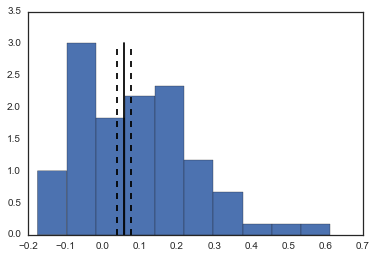

In [76]:
target,i_bin = 'C12',0
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');

(array([ 64.,  18.,   9.,   3.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([  1.40000000e-05,   2.25220000e-03,   4.49040000e-03,
          6.72860000e-03,   8.96680000e-03,   1.12050000e-02,
          1.34432000e-02,   1.56814000e-02,   1.79196000e-02,
          2.01578000e-02,   2.23960000e-02]),
 <a list of 10 Patch objects>)

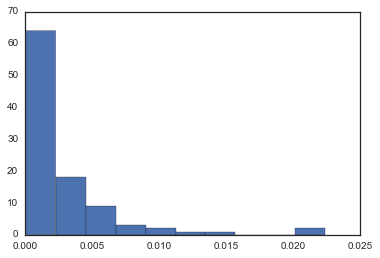

In [60]:
plt.hist(weights)